#EE-411, HomeWork 1 : Maximum Likelihood & Probability
Submission for Culha Defne (SCIPER 353020)

EPFL, Autumn 2022




##Part 1 - First passage time of a one-dimensional Brownian particle

###Question 1.1


$$p(t|d, D) = \frac{d}{\sqrt{4\pi Dt}} exp(-\frac{d^2}{4Dt})$$ 

which is the Levy distribution with loc = 0 and scale = $d^2/(2D)$

<p>For the data likelihood <span class="math inline">\(p(\{t_i\} | D, d)\)</span> we consider that each datum <span class="math inline">\(t_i\)</span> is iid, so:
$$p(\{t_i\} | d, D) = \prod_{i=1}^N p(t_i | d, D) = \prod_{i=1}^N\frac{d}{\sqrt{4\pi Dt}} exp(-\frac{d^2}{4Dt})$$

And since the prior for $D$ is uniform in MLE, we get:
$$p(D | \{t_i\}, d, D) \propto \prod_{i=1}^N p(t_i | d, D)$$


Log-likelyihood is defined as $L(t| d, D)=\log p(t_i | d, D)$

As we learned, to maximize the probability of a product is to maximize the sum of their logarithm. Since summing is usually easier for computers, log-likelihood comes in very handy.

Therefore,

$$L(\{t_i\} | d, D) = \sum_{i=1}^N log(p(t_i | d, D)) = \sum_{i=1}^Nlog(\frac{d}{\sqrt{4\pi Dt}} exp(-\frac{d^2}{4Dt}))$$

$$L_n(\{t_i\} | d, D) = 1/N*\sum_{i=1}^N log(p(t_i | d, D)) = 1/N*\sum_{i=1}^Nlog(\frac{d}{\sqrt{4\pi Dt}} exp(-\frac{d^2}{4Dt}))$$

$$L(D | \{t_i\}, d) \propto \sum_{i=1}^N log(p(t_i | d, N))$$

$$L_n(D | \{t_i\}, d) \propto 1 / N * \sum_{i=1}^N log(p(t_i | d, N))$$


### Question 1.2

To write a program that simulates n such observations sampled from the Levy probability distribution given in part 1, levy method from scipy was imported. Then it was used to create the method generate_levy which inputs the distance(d), diffusion_constant(D) and number of samples wanted (N) to generate and return N sample points (t).



In [ ]:
import numpy as np
import math
np.random.seed(123456) # we set the seed of the random generator

In [ ]:
from scipy.stats import levy

#Method to generate Levy distributed samples.

def generate_levy(N, distance, diffusion_const):
  miu = 0
  c = distance**2/(2*diffusion_const)
  t = levy.rvs(loc=miu,scale=c,size=N)
  return t # rvs stands for Random Variates, i.e. particular outcomes of a random variable

In [ ]:
generate_levy(10, 2, 3)

array([2.86225402e-01, 3.82925080e+02, 5.26499244e-01, 3.99667862e+01,
       8.53299709e-01, 7.20888363e-01, 1.17537869e+00, 1.64085038e+01,
       2.80418183e-01, 1.80199777e+00])

To calculate log-likelihood, a method loglh was written to compute the logarithm of probability given d, D and t. 

In [ ]:
#Method to calculate log-likelihood

def loglh(distance, diffusion_constant, t):
  logl=0
  for k in t: 
    prob = distance / np.sqrt(4 * np.pi * diffusion_constant * k**3) * math.exp(-distance**2 / (4 * diffusion_constant * k))
    logl+=np.log(prob)
    #display(logl)
  return logl

In [ ]:
distance = 2
diff = 2
t = generate_levy(39, distance, diff)
loglh(distance, diff, t)

-114.36917980308375

Log-likelihood of diffusion constant D was calculated given generated the data for n = 10, 20 and 100 samples. The log-likelihood for different diffusion constants between 0 and 5 were computed and presented in plots below for each value of N. As observed, when sample size N increases (ie. data gets richer), the peak is narrower near the true value of D and it is easier to detect and estimate the D. 

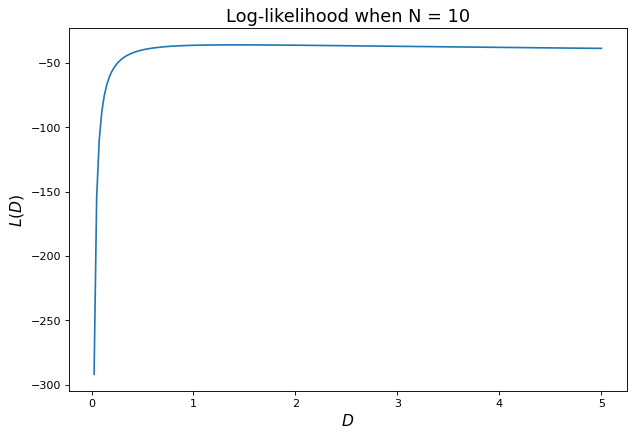

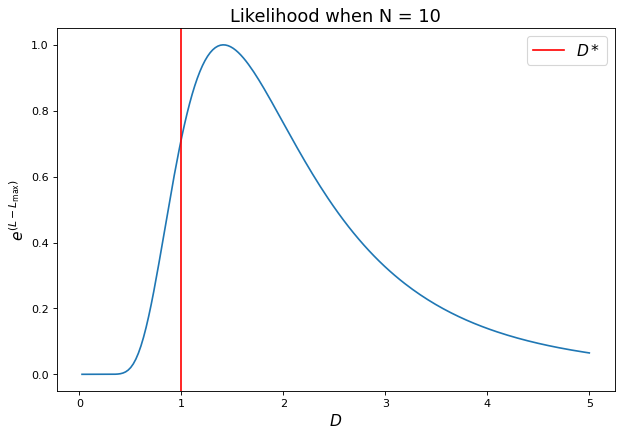

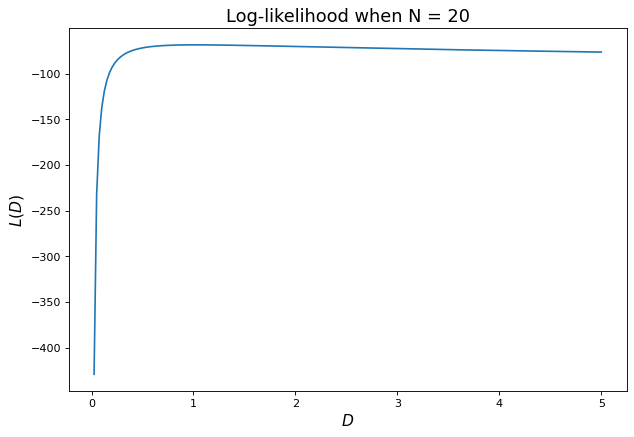

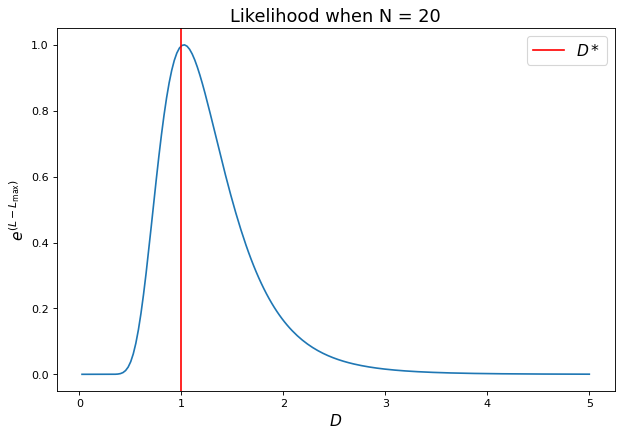

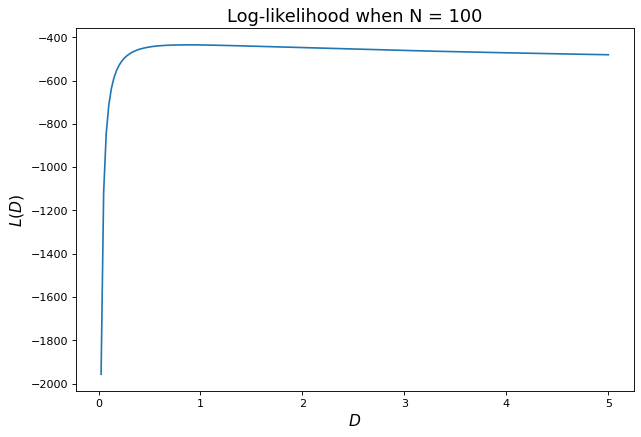

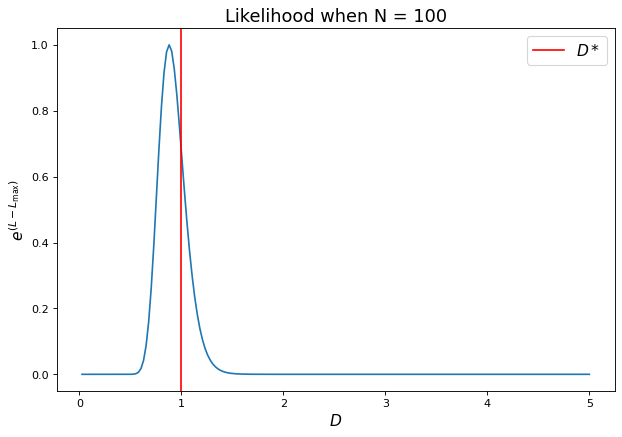

In [ ]:
import matplotlib.pyplot as plt

tab_N = [10, 20, 100]
distance = 2
diffusion = 1

for N in tab_N:
  tab_D=np.linspace(0,5,200)[1:] # we generate a table for D values from 0 to 5 
  t = generate_levy(N, distance, diffusion) #assume diffusion = 1 and generate levy-distributed samples for each N 
  logl_D = np.array([loglh(distance,D,t) for D in tab_D]) # we compute the loglh for each value in the table
  fig = plt.figure(figsize=(9,6), dpi=80)
  plt.title('Log-likelihood when N = %i'%N, fontsize=16)
  plt.xlabel('$D$', fontsize=14)
  plt.ylabel('$L(D)$', fontsize=14)
  plt.plot(tab_D,logl_D)

  fig = plt.figure(figsize=(9,6), dpi=80)
  plt.title('Likelihood when N = %i'%N, fontsize=16)
  plt.xlabel('$D$', fontsize=14)
  plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
  plt.plot(tab_D,np.exp(logl_D-max(logl_D)))
  plt.axvline(diffusion,color="r",label='$D*$')
  plt.legend(fontsize=14);
#  D_true= 10**(-6)
  #plt.axvline(diffusion,color="r",label='$D*$')
  plt.legend(fontsize=14);

### Question 1.3

The maximum likelyhood estimator gives us the parameters of the distribution that make the observation of a given set of data $\{x_i\}$ most likely. Assuming that the observations are independent, and that the probability of observing $x$ is given by the probability distribution $P(x|\lambda)$
$$
\widehat{\lambda}_{ML}=argmax_{\lambda}\prod_i P(x_i|\lambda)=argmax_{\lambda}\left(\sum_i\log(P(x_i|\lambda))\right)
$$
As we learned, to maximize the probability of a product is to maximize the sum of their logarithm. 


For different values of D_true (that is not known to us), samples were generated for different sizes. Then, to compute the estimate using Maximum Likelihood method, first D was guessed as a random point between 0 and 5. Then, as we learned, to maximize the probability of a product is to maximize the sum of their logarithm. As it can be seen in section 1.2, loglikelihood function is concave so -loglikelihood function is convex. Therefore we can use minimize function from scipy to get the point where it is the lowest. We call this point the optimum and we return it for each different data set of different size. 

Next, for each different true value of D, the estimated D was presented with scatters. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


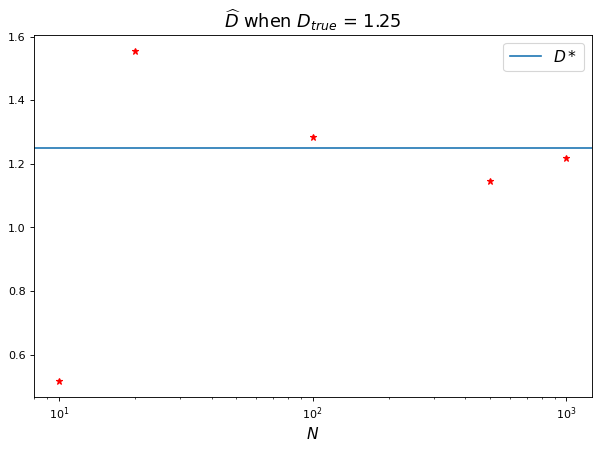

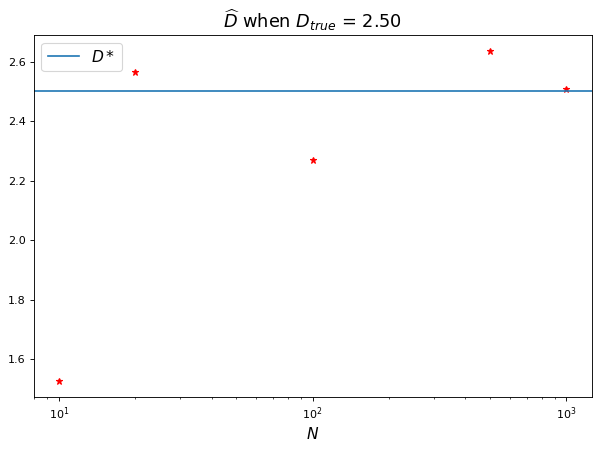

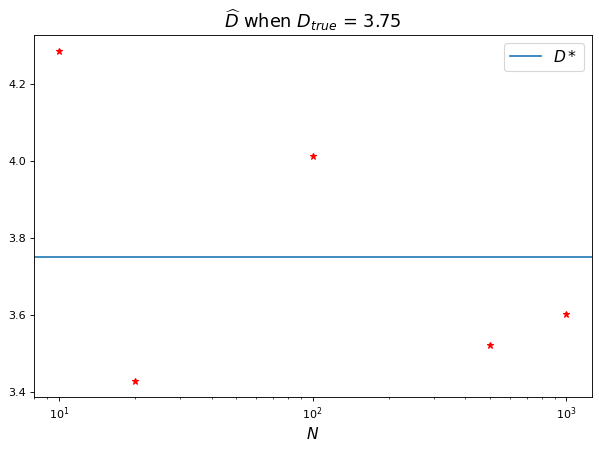

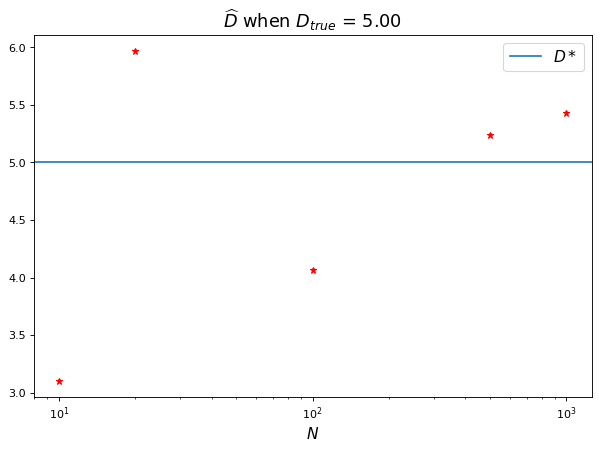

In [ ]:
from scipy.optimize import minimize
#tab_D=np.linspace(0,5,200)[1:]

tab_N = [10, 20, 100, 500, 1000]#, 1000, 5000]
#tab_N = logspace(0, 4, 20)

distance = 2


#len_D_true = 5
#tab_D_true = np.linspace(0,5,len_D_true)
tab_D_true=np.linspace(0,5,5)[1:]
len_D_true = tab_D_true.size

for di in range (0, len_D_true):
  D_true = tab_D_true[di]
      
  D_ML = []

  for N in tab_N:
    t = generate_levy(N, distance, D_true)
    D_guess = np.random.uniform(0,5)
    optimum = minimize(lambda D:-loglh(distance,D,t),D_guess, method='Nelder-Mead')
    D_ML.append(optimum.x)

    
  fig = plt.figure(figsize=(9,6), dpi=80)
  plt.title('$\widehat{D}}_,{ML}$ when $D_{true}$ = %.2f' %D_true, fontsize=16)
  plt.xlabel('$N$', fontsize=14)
  plt.plot(tab_N,D_ML,"*",color='r')
  plt.axhline(D_true, label="$D*$")
  plt.xscale("log")
  #plt.ylim(D_true,D_true+1)
  plt.legend(fontsize=14);



### Question 1.4

Next, Jeffrey prior was used to make the first guess using the Fischer information as $$prior(D) \propto \sqrt{\det[I_N(D)]}$$

In this problem, $$I_N(D) =\begin{bmatrix}\frac{N}{2D^2} & 0\\0 & \frac{N}{2D^2}\end{bmatrix}$$

And therefore, 
$$\det [I_N(D)] = \frac{N^2}{4D^4}$$

And 

$$prior(D) \propto \sqrt{\det[I_N(D)]} = \frac{N}{2D^2}$$ 

And when normalized, 

$$prior(D) = \frac{1}{2D^2}$$ 

This approach was used to determine the prior and then return the sum of logarithm for probability given d, D and t. 

In [ ]:
def jeffpost(distance,diffusion_constant,t):
  ## CHECK THIS
  #jp= -1/2*np.log(2*diffusion_constant**2) #prior
  jp= -1/2*np.log(2*diffusion_constant**2)
  ### prior = -(1/2)*np.log(2*(D**2))
  for i in t:
    prob = distance / np.sqrt(4 * np.pi * diffusion_constant * i**3) * math.exp(-distance**2 / (4 * diffusion_constant * i))
    jp+=np.log(prob)
  return jp



Like in part 1.3, for different values of D_true (that is not known to us), samples were generated for different sizes. Then, to compute the estimate, this time Jeffrey prior function was used. Then, same as part 1.3, minimize function from scipy was used to get the point where the -loglikelihood function is the lowest. We call this point the optimum and we return it for each different data set of different size.

Next, for each different true value of D, the estimated D was presented with scatters.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


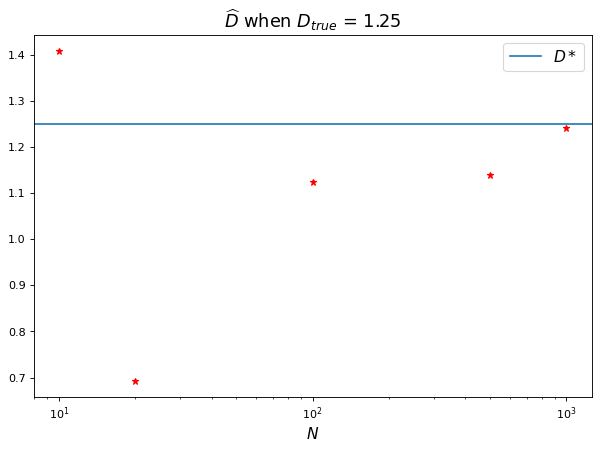

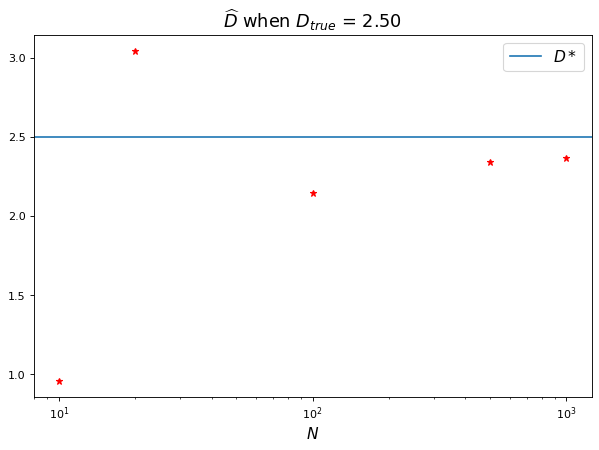

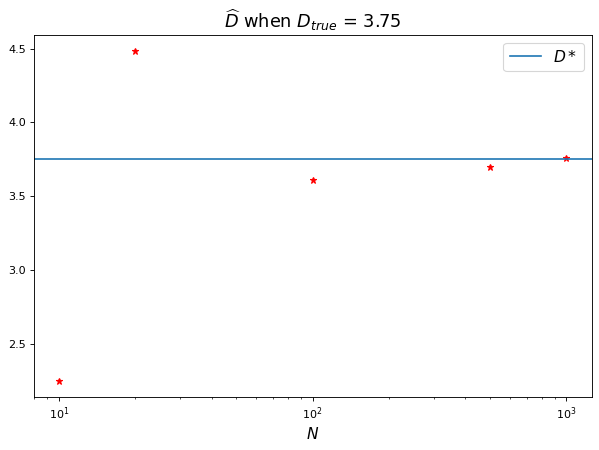

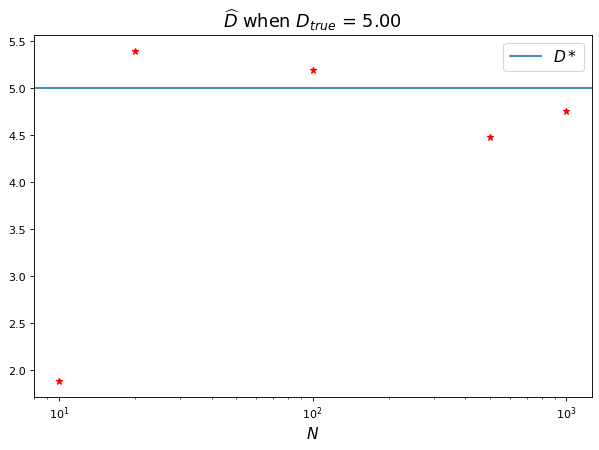

In [ ]:
##### To plot against D

tab_N = [10, 20, 100, 500, 1000]#, 1000, 5000]

distance = 2

tab_D_true=np.linspace(0,5,5)[1:]
len_D_true = tab_D_true.size

for di in range (0, len_D_true):
  D_true = tab_D_true[di]
      
  D_J = []

  for N in tab_N:
    t = generate_levy(N, distance, D_true)
    D_guess = np.random.uniform(0,5)
    optimum = minimize(lambda D:-jeffpost(distance,D,t),D_guess, method='Nelder-Mead')
    D_J.append(optimum.x)
    
  fig = plt.figure(figsize=(9,6), dpi=80)
  plt.title('$\widehat{D}}_,{J}$ when $D_{true}$ = %.2f' %D_true, fontsize=16)
  plt.xlabel('$N$', fontsize=14)
  plt.plot(tab_N,D_J,"*",color='r')
  plt.axhline(D_true, label="$D*$")
  plt.xscale("log")
  plt.legend(fontsize=14);



### Question 1.5

The mean square error (MSE) is defined as the expectation
value of the square of the difference beween the estimator and the true value of parameter.

$$MSE(\widehat{D};D) \equiv \mathop{\mathbb{E}_{\widehat{D}}}\big[ (\widehat{D} - D)^2 \big]$$

A method which inputs N, $\widehat{D}$ and estimated D values and outputs the MSE is created.

In [ ]:
from numpy import percentile
from numpy.random import choice

#def compute_MSE(D_est, D_true, N):
#  MSE = 0;
#  D_diff = D_est - D_true
#  MSE = 1/N*np.sum(np.square(D_diff))

def MSE_est(D_true, D_est, n):
  N_boot = 100
  MSE = (D_est - np.full(n, D_true))**2 #avoid for loops!
  #MSE = (D_est - D_true)**2
  MSE_mean = MSE.mean()
  return MSE_mean



In [ ]:
### At d = d_tab[0];
#At d=1.25

tab_D_true=np.linspace(0,5,5)[1:]
len_D_true = tab_D_true.size

#D_true= tab_D_true[0] #D_true = 1.25

tab_N = [10, 20, 100, 500, 1000]#, 1000, 5000]
distance = 2
MSE_ML =[]
MSE_J = []

for D_true in tab_D_true:

  J_est_D = []
  ML_est_D=[]
#for N in tab_N:

  for N in tab_N:
    t = generate_levy(N, distance, D_true)
    D_guess = np.random.uniform(0,5)
    optimumML = minimize(lambda D:-loglh(distance,D,t),D_guess, method='Nelder-Mead')
    optimumJ = minimize(lambda D:-jeffpost(distance,D,t),D_guess, method='Nelder-Mead')

    ML_est_D.append(optimumML.x)
    J_est_D.append(optimumJ.x)

  MSE_ML_i = MSE_est(D_true,ML_est_D,N)
  MSE_ML.append(MSE_ML_i)

  MSE_J_i = MSE_est(D_true,J_est_D,N)
  MSE_J.append(MSE_J_i)



display(MSE_ML)
display(MSE_J)

[0.13658749563723832,
 0.05233663719942479,
 2.583400906407178,
 0.29978327551301165]

[0.04968965875171156,
 0.1565568716897403,
 1.3142784990239906,
 0.18091677270684878]

In [ ]:
#For each d, find MSE
MSE_ML = []
for di in range (0, len_D_true):
  print('when d =')
  D_true = tab_D_true[di]
  for N in [10, 100, 1000]:
    print('when N =')
  #for each N, find the MSE
    MSE_ML_di = MSE_est(D_true, D_ML, N)
  # MSE_ML now stores MSE for different N
    MSE_ML.append(MSE_ML_di)
    display(MSE_ML_di)

display(MSE_ML)

when d =
when N =


13.40016386751271

when N =


13.400163867512708

when N =


13.40016386751271

when d =
when N =


6.185640375620802

when N =


6.185640375620802

when N =


6.185640375620802

when d =
when N =


2.096116883728895

when N =


2.0961168837288957

when N =


2.0961168837288953

when d =
when N =


1.1315933918369883

when N =


1.1315933918369883

when N =


1.1315933918369883

[13.40016386751271,
 13.400163867512708,
 13.40016386751271,
 6.185640375620802,
 6.185640375620802,
 6.185640375620802,
 2.096116883728895,
 2.0961168837288957,
 2.0961168837288953,
 1.1315933918369883,
 1.1315933918369883,
 1.1315933918369883]

For N = 10 (and later for N = 100 and N = 1000), at different values of the true value of D, MSE was computed, for both methods to compute the estimates (MLE and Jeffrey prior). The plots below present MSE of estimated D values using both methods.

In [ ]:
tab_D_true=np.linspace(0,5,5)[1:]
len_D_true = tab_D_true.size

tab_N = [10, 100, 1000]
N= 10
MSE_ML = []
MSE_J = []
Cramer = []

for di in range (0, len_D_true):
  D_true = tab_D_true[di]
      
  D_J = []
  D_ML = []


  for i in range (0,N):
    #for each D, generate random samples, find MSE
    t = generate_levy(100, distance, D_true)
    D_guess = np.random.uniform(0,5)
    optimum_ML = minimize(lambda D:-loglh(distance,D,t),D_guess, method='Nelder-Mead')
    D_ML.append(optimum_ML.x)
    optimum_J = minimize(lambda D:-jeffpost(distance,D,t),D_guess, method='Nelder-Mead')
    D_J.append(optimum_J.x)

    
  # For each d, find MSE for ML
  MSE_ML_di = MSE_est(D_true, D_ML, N)
  MSE_ML.append(MSE_ML_di)
  ##display (D_ML)
  MSE_J_di = MSE_est(D_true, D_J, N)
  MSE_J.append(MSE_J_di)
  #display(MSE_J)
  cramer_di = 2*D_true*D_true/(N*N)
  Cramer.append(cramer_di)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


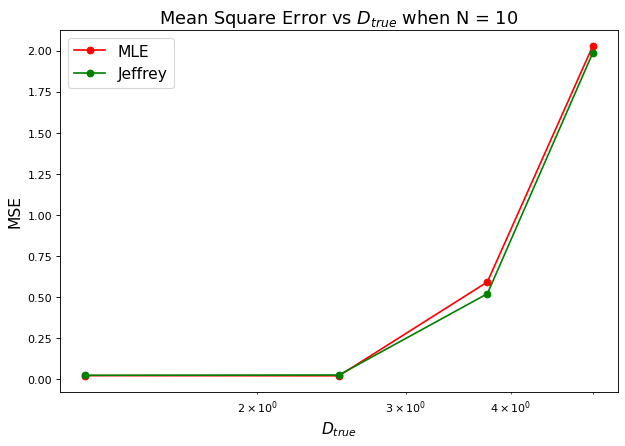

In [ ]:
  fig = plt.figure(figsize=(9,6), dpi=80)
  plt.title('Mean Square Error vs $D_{true}$ when N = %i' %N, fontsize=16)
  plt.xlabel('$D_{true}$', fontsize=14)
  plt.ylabel('MSE', fontsize=14)
  plt.plot(tab_D_true,MSE_ML,"-o",color='r', label = 'MLE')
  plt.plot(tab_D_true,MSE_J,"-o",color='g',label='Jeffrey')
  #plt.axhline(D_true, label="$D*$")
  plt.xscale("log")
  plt.legend(fontsize=14);

In [ ]:
tab_D_true=np.linspace(0,5,5)[1:]
len_D_true = tab_D_true.size

tab_N = [10, 100, 1000]
N= 100
MSE_ML_100 = []
MSE_J_100 = []
Cramer_100 = []

for di in range (0, len_D_true):
  D_true = tab_D_true[di]
      
  D_J = []
  D_ML = []


  for i in range (0,N):
    #for each D, generate random samples, find MSE
    t = generate_levy(100, distance, D_true)
    D_guess = np.random.uniform(0,5)
    optimum_ML = minimize(lambda D:-loglh(distance,D,t),D_guess, method='Nelder-Mead')
    D_ML.append(optimum_ML.x)
    optimum_J = minimize(lambda D:-jeffpost(distance,D,t),D_guess, method='Nelder-Mead')
    D_J.append(optimum_J.x)

    
  # For each d, find MSE for ML
  MSE_ML_di = MSE_est(D_true, D_ML, N)
  MSE_ML_100.append(MSE_ML_di)
  ##display (D_ML)
  MSE_J_di = MSE_est(D_true, D_J, N)
  MSE_J_100.append(MSE_J_di)
  #display(MSE_J)
  cramer_di = 2*D_true*D_true/(N*N)
  Cramer_100.append(cramer_di)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


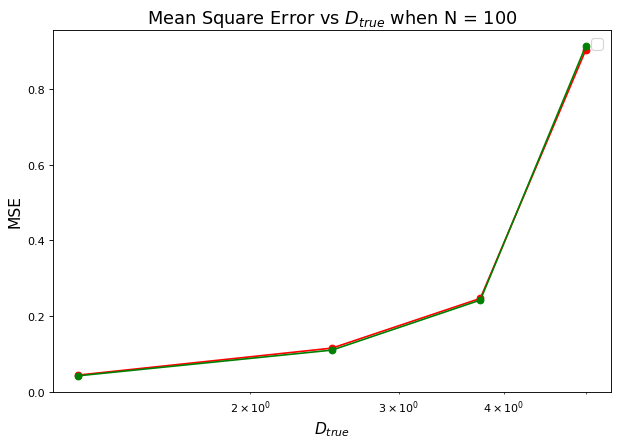

In [ ]:
  fig = plt.figure(figsize=(9,6), dpi=80)
  plt.title('Mean Square Error vs $D_{true}$ when N = %i' %N, fontsize=16)
  plt.xlabel('$D_{true}$', fontsize=14)
  plt.ylabel('MSE', fontsize=14)
  plt.plot(tab_D_true,MSE_ML_100,"-o",color='r')
  plt.plot(tab_D_true,MSE_J_100,"-o",color='g')
  #plt.axhline(D_true, label="$D*$")
  plt.xscale("log")
  plt.legend(fontsize=14);

In [ ]:
tab_D_true=np.linspace(0,5,5)[1:]
len_D_true = tab_D_true.size

tab_N = [10, 100, 1000]
N= 1000
MSE_ML_1000 = []
MSE_J_1000 = []
Cramer_1000 = []

for di in range (0, len_D_true):
  D_true = tab_D_true[di]
      
  D_J = []
  D_ML = []


  for i in range (0,N):
    #for each D, generate random samples, find MSE
    t = generate_levy(100, distance, D_true)
    D_guess = np.random.uniform(0,5)
    optimum_ML = minimize(lambda D:-loglh(distance,D,t),D_guess, method='Nelder-Mead')
    D_ML.append(optimum_ML.x)
    optimum_J = minimize(lambda D:-jeffpost(distance,D,t),D_guess, method='Nelder-Mead')
    D_J.append(optimum_J.x)

    
  # For each d, find MSE for ML
  MSE_ML_di = MSE_est(D_true, D_ML, N)
  MSE_ML_1000.append(MSE_ML_di)
  ##display (D_ML)
  MSE_J_di = MSE_est(D_true, D_J, N)
  MSE_J_1000.append(MSE_J_di)
  #display(MSE_J)
  cramer_di = 2*D_true*D_true/(N*N)
  Cramer_1000.append(cramer_di)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


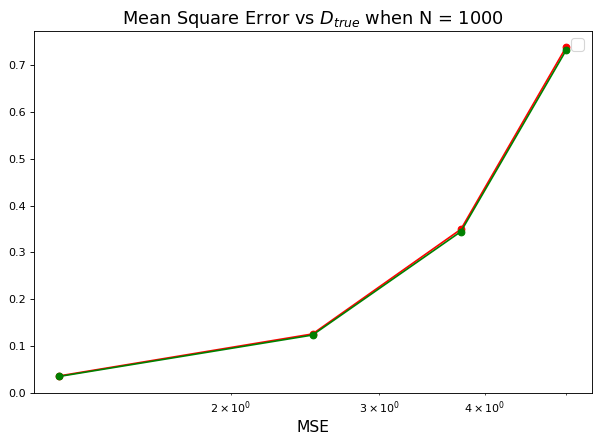

In [ ]:
  fig = plt.figure(figsize=(9,6), dpi=80)
  plt.title('Mean Square Error vs $D_{true}$ when N = %i' %N, fontsize=16)
  plt.xlabel('$D_true$', fontsize=14)
  plt.xlabel('MSE', fontsize=14)
  plt.plot(tab_D_true,MSE_ML_1000,"-o",color='r')
  plt.plot(tab_D_true,MSE_J_1000,"-o",color='g')
  #plt.axhline(D_true, label="$D*$")
  plt.xscale("log")
  plt.legend(fontsize=14);

### Question 1.6

Next Cramer-Rao Bound was computed. For the unbiassed estimators, it is expected to have the MSE to be greater than the Cramer-Rao bound. So in our case,

RB tells us that for each value of our parameter $D_i$ we have

$$MSE(\widehat{D_i}_{ML};D_i) \geq \{[I_N({D})]^{-1}\}_{ii}$$

where $I_N(\mathbf{\lambda})$ is the Fisher information.

Therefore, in this problem,

$$MSE(\widehat{D_i}_{ML};D_i) \geq \frac{2D^2}{N}$$

For each N, Cramer Raobound was computed at different values of true value of D and as observed. The MSE for Jeffrey, MLE was plotted at the same graphs as Cramer-Rao bound. As observed, Cramer Rao is always smaller than MSE of the estimates using MLE. This fullfills the expectation that the Cramer-Rao bound of error is the best one can get with the estimates using unbiassed estimators like MLE. Cramer Rao doesn't need to bound Jeffrey since it is biassed. From the plots, it can also be observed that, when N is larger, the MLE and also Jeffrey behave closer to Cramer Rao bound (error is smaller. Moreover, Jeffrey has lower MSE in most cases. Therefore, it would be the chosen estimator.

array([1.25, 2.5 , 3.75, 5.  ])

array([ 1.5625,  6.25  , 14.0625, 25.    ])

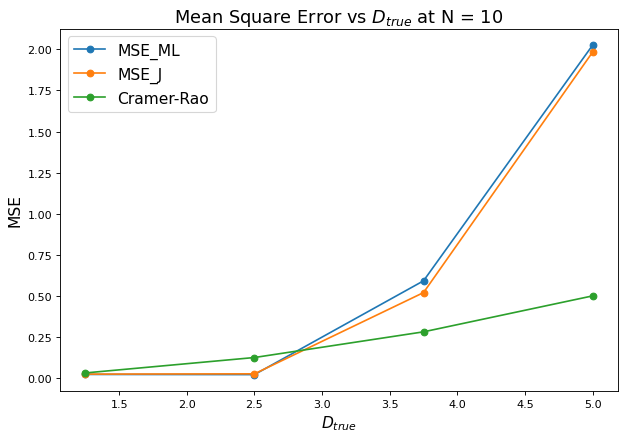

In [ ]:
  tab_D_true_to_plot=np.linspace(1,5,200)[1:]
  Cramer_to_plot = (tab_D_true_to_plot* np.transpose(tab_D_true_to_plot)) / (N*N)  
  display(tab_D_true)
  display(tab_D_true*tab_D_true)
  fig = plt.figure(figsize=(9,6), dpi=80)
  plt.title('Mean Square Error vs $D_{true}$ at N = 10', fontsize=16)
  plt.xlabel('$D_{true}$', fontsize=14)
  plt.ylabel('MSE', fontsize=14)
  plt.plot(tab_D_true,MSE_ML,"-o", label = 'MSE_ML')
  plt.plot(tab_D_true,MSE_J,"-o", label = 'MSE_J')
  ###
  #plt.plot(tab_D_true,Cramer,"-o",label = 'Cramer-Rao')
  ###
  plt.plot(tab_D_true,2*tab_D_true*tab_D_true/100,"-o",label = 'Cramer-Rao')
  #plt.plot(tab_D_true_to_plot,Cramer_to_plot,"-",color='b')
  #plt.axhline(D_true, label="$D*$")
  #plt.yscale("log")
  plt.legend(fontsize=14);

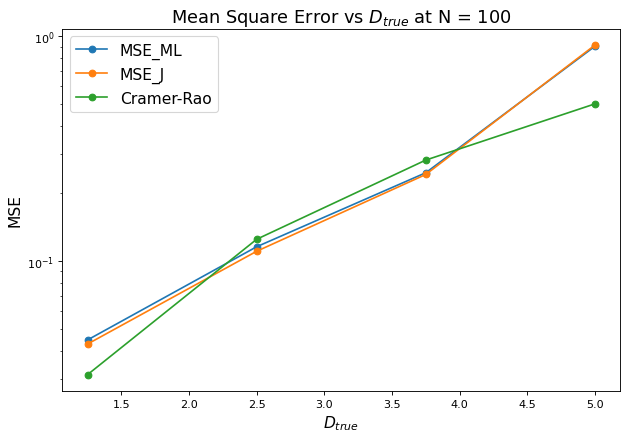

In [ ]:
  tab_D_true_to_plot=np.linspace(1,5,200)[1:]
  Cramer_to_plot = (tab_D_true_to_plot* np.transpose(tab_D_true_to_plot)) / (N*N)  
  
  fig = plt.figure(figsize=(9,6), dpi=80)
  plt.title('Mean Square Error vs $D_{true}$ at N = 100', fontsize=16)
  plt.xlabel('$D_{true}$', fontsize=14)
  plt.ylabel('MSE', fontsize=14)
  plt.plot(tab_D_true,MSE_ML_100,"-o", label = 'MSE_ML')
  plt.plot(tab_D_true,MSE_J_100,"-o", label = 'MSE_J')
  ###plt.plot(tab_D_true,Cramer_100,"-o",label = 'Cramer-Rao')
  plt.plot(tab_D_true,2*tab_D_true*tab_D_true/100,"-o",label = 'Cramer-Rao')
  #plt.plot(tab_D_true_to_plot,Cramer_to_plot,"-",color='b')
  #plt.axhline(D_true, label="$D*$")
  plt.yscale("log")
  plt.legend(fontsize=14);

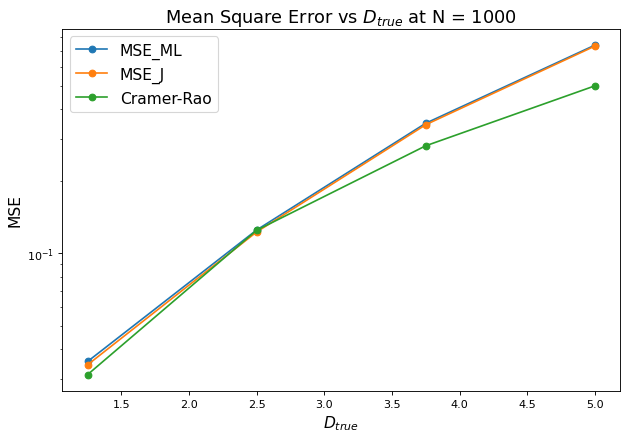

In [ ]:
  tab_D_true_to_plot=np.linspace(1,5,200)[1:]
  Cramer_to_plot = (tab_D_true_to_plot* np.transpose(tab_D_true_to_plot)) / (N*N)  
  
  fig = plt.figure(figsize=(9,6), dpi=80)
  plt.title('Mean Square Error vs $D_{true}$ at N = 1000', fontsize=16)
  plt.xlabel('$D_{true}$', fontsize=14)
  plt.ylabel('MSE', fontsize=14)
  plt.plot(tab_D_true,MSE_ML_1000,"-o", label = 'MSE_ML')
  plt.plot(tab_D_true,MSE_J_1000,"-o", label = 'MSE_J')
  ###plt.plot(tab_D_true,Cramer_1000,"-o",label = 'Cramer-Rao')
  plt.plot(tab_D_true,2*tab_D_true*tab_D_true/100,"-o",label = 'Cramer-Rao')
  #plt.plot(tab_D_true_to_plot,Cramer_to_plot,"-",color='b')
  #plt.axhline(D_true, label="$D*$")
  plt.yscale("log")
  plt.legend(fontsize=14);

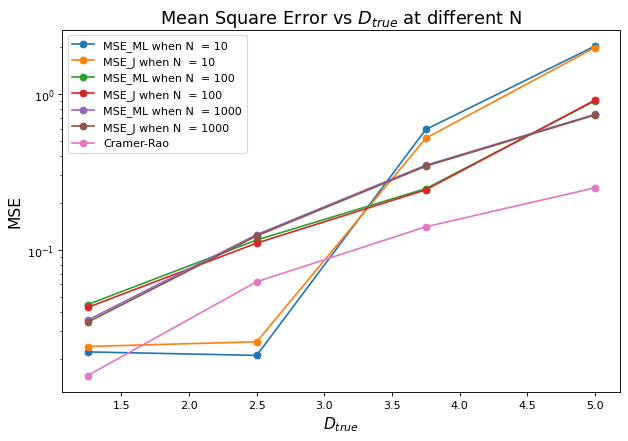

In [ ]:
  tab_D_true_to_plot=np.linspace(1,5,200)[1:]
  Cramer_to_plot = (tab_D_true_to_plot* np.transpose(tab_D_true_to_plot)) / (N*N)  
  
  fig = plt.figure(figsize=(9,6), dpi=80)
  plt.title('Mean Square Error vs $D_{true}$ at different N', fontsize=16)
  plt.xlabel('$D_{true}$', fontsize=14)
  plt.ylabel('MSE', fontsize=14)
  plt.plot(tab_D_true,MSE_ML,"-o", label = 'MSE_ML when N  = 10')
  plt.plot(tab_D_true,MSE_J,"-o", label = 'MSE_J when N  = 10')
  ###plt.plot(tab_D_true,Cramer,"-o",label = 'Cramer-Rao N  = 10')
  plt.plot(tab_D_true,MSE_ML_100,"-o", label = 'MSE_ML when N  = 100')
  plt.plot(tab_D_true,MSE_J_100,"-o", label = 'MSE_J when N  = 100')
  ###plt.plot(tab_D_true,Cramer_100,"-o",label = 'Cramer-Rao N  = 100')
  plt.plot(tab_D_true,MSE_ML_1000,"-o", label = 'MSE_ML when N  = 1000')
  plt.plot(tab_D_true,MSE_J_1000,"-o", label = 'MSE_J when N  = 1000')
  ###plt.plot(tab_D_true,Cramer_1000,"-o",label = 'Cramer-Rao N  = 1000')
  plt.plot(tab_D_true,tab_D_true*tab_D_true/100,"-o",label = 'Cramer-Rao')
  #plt.plot(tab_D_true_to_plot,Cramer_to_plot,"-",color='b')
  #plt.axhline(D_true, label="$D*$")
  plt.yscale("log")
  plt.legend();

##Question 2: Probability bounds and a pooling problem

### Question 2.1

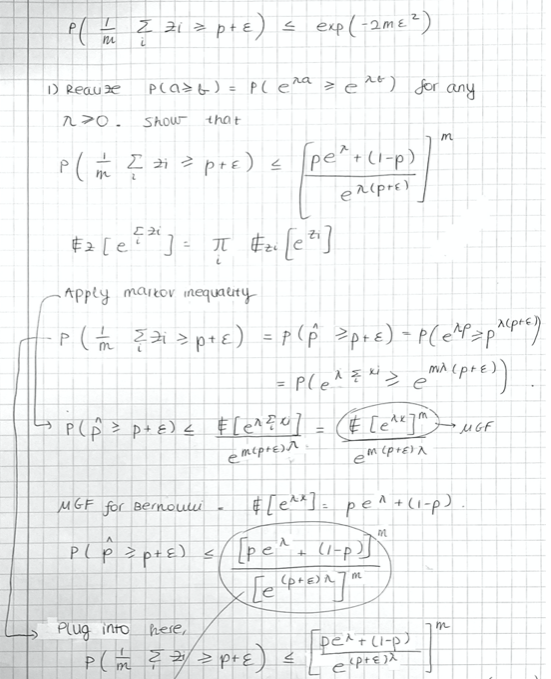

###Question 2.2

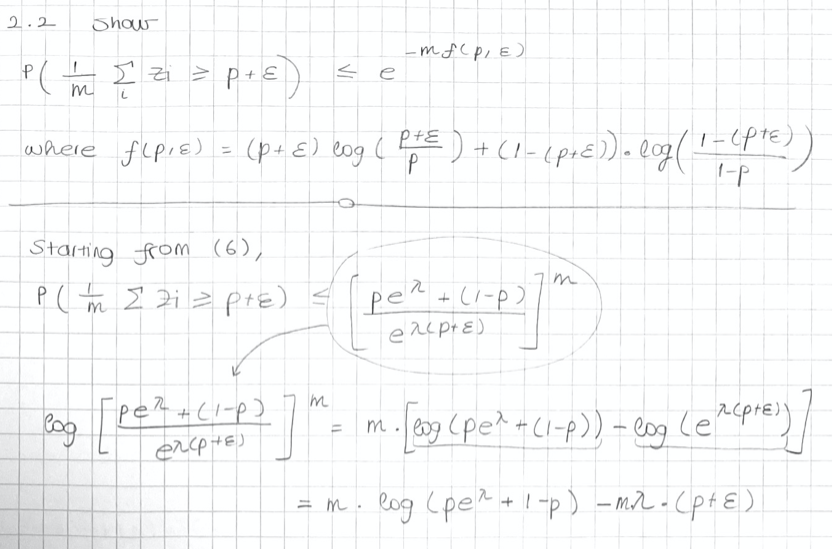

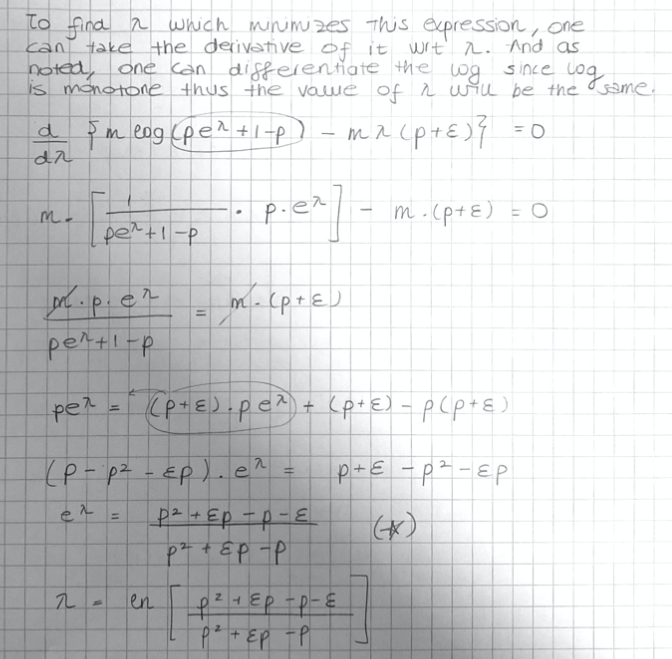

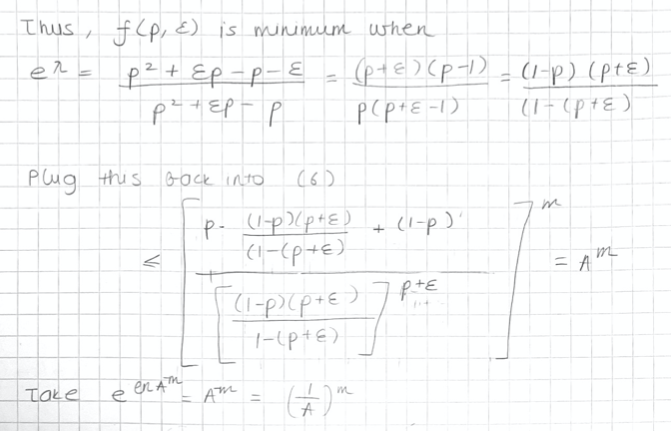

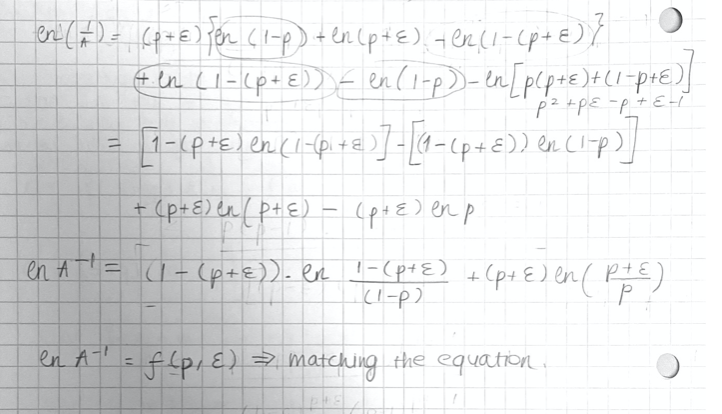

###Question 2.3

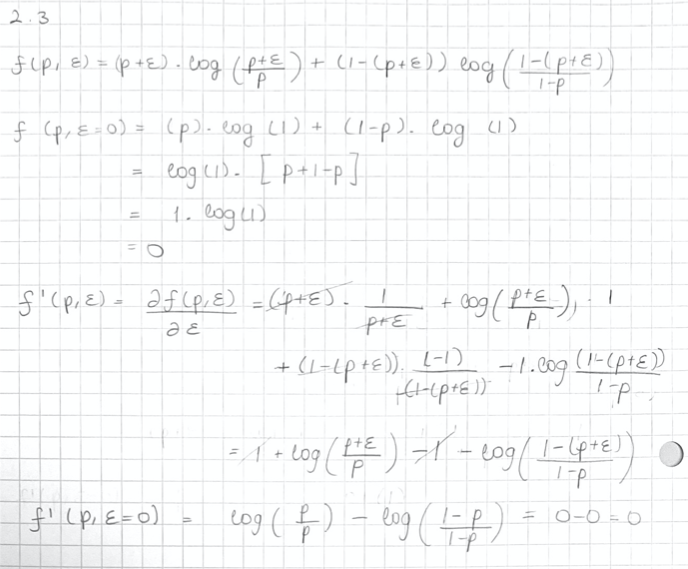

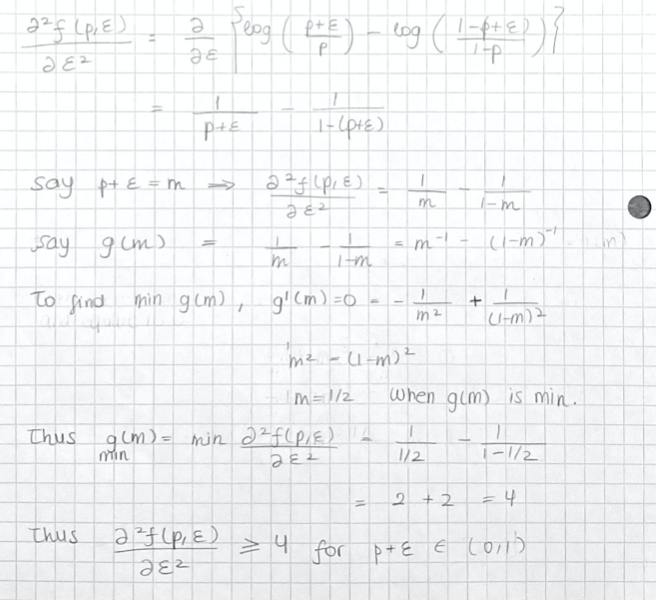

###Question 2.4

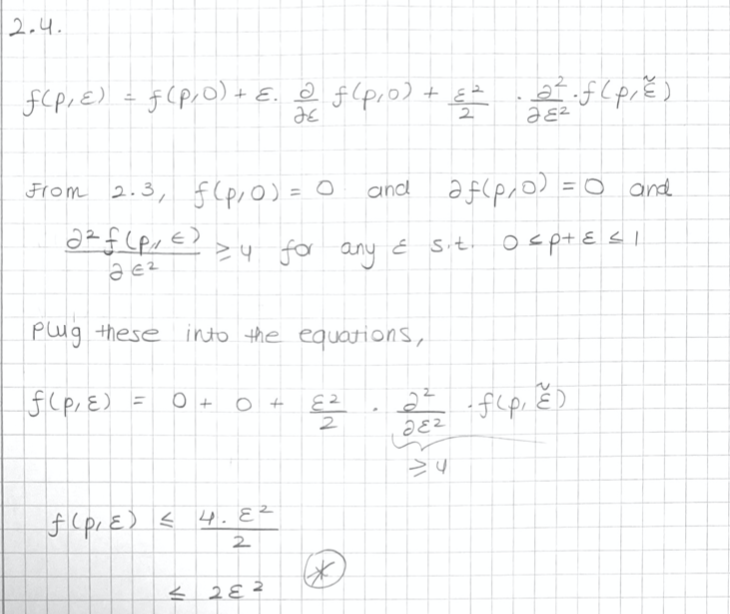

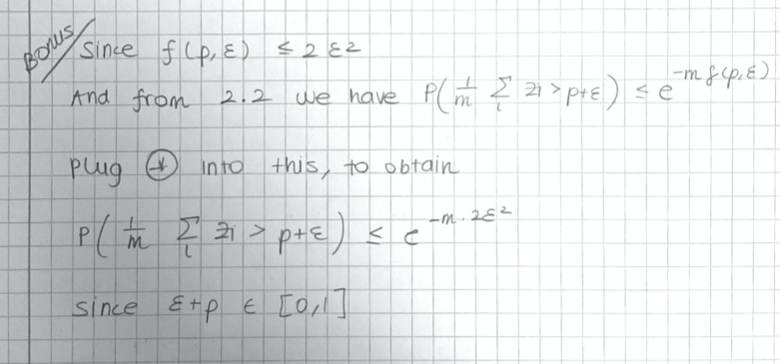

###Question 2.5

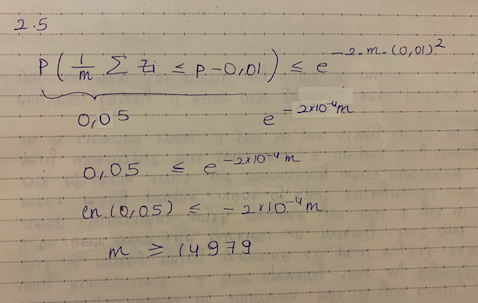

###Question 2.6

To define a function that takes the number of people m and the probability p as arguments and returns a random array of m votes, bernouilli method from scipy was used to generate m Bernoulli-distributed samples with probability p.

In [ ]:
from scipy.stats import bernoulli
import numpy as np

def generate_votes(m, p):
  votes = bernoulli.rvs(p, size=m)
  return votes # rvs stands for Random Variates, i.e. particular outcomes of a random variable

To estimate p given votes, a function was written just by averaging the given votes.

In [ ]:
def estimate_p (votes):
  total_yes = np.sum(votes)
  x = len(votes)
  p = total_yes/ x
  p = np.mean(votes)
  return p

Starting with fixed values of m = $m^∗$ calculated in part 2.5 and $p ∈ \{0.2, 0.5, 0.8\}$, polls were simulated using generate_votes function, p was estimated using estimate_p function.

In [ ]:
m_min = 14979
p_tab = [0.2, 0.5, 0.8]
p_est = []

for pi in p_tab:
  votes_i = generate_votes(m_min, pi)
  av_pi = estimate_p(votes_i)
  p_est.append(av_pi)

display(p_est)

[0.20001335202616996, 0.5007009813739235, 0.8005874891514787]

For different values of p, and m set as $m^*$, the 95% confidence interval and the probability that p is estimated in the desired range (within one percent of $p^*$) is displayed below. It can be concluded that $m^*$ overestimates the number of votes needed since the probability that p is estimated in the desired range (within one percent of $p^*$) is almost 100% in all cases. A smaller $m^*$ could suffice to get 95%. It can also be observed from experiments that it is hardest to estimate p when p is 0.5 and easiest when p = 0.2.

In [ ]:

m_min=14979
CI = 95
CI_min = (100-CI)/2
CI_max = 100 - CI_min
reps = 1000
tab_p = [0.2, 0.5, 0.8]

for p in tab_p:
  print('When p = ',p)
  av_votes_k = []
  for k in range (0, reps):
    votes_k = generate_votes(m_min, p)
    av_pk = estimate_p(votes_k)
    av_votes_k.append(av_pk)

  count = 0
  for ak in av_votes_k:
    if ((ak >=(p-0.01)) & (ak <=(p+0.01))):
      count=count+1

  percentage_within_desire = count / reps

  votes_averages_CI = np.percentile(av_votes_k, [CI_min,CI_max])

  print('95% of times, p estimates are between', votes_averages_CI[0], votes_averages_CI[1])
  print('Probability that error < 0.01 is',(percentage_within_desire*100),'%')
  print(' ')

When p =  0.2
95% of times, p estimates are between 0.1936711395954336 0.2065558448494559
Probability that error < 0.01 is 100.0 %
 
When p =  0.5
95% of times, p estimates are between 0.4922875358835703 0.508249883169771
Probability that error < 0.01 is 98.4 %
 
When p =  0.8
95% of times, p estimates are between 0.7938447159356432 0.8066676680686294
Probability that error < 0.01 is 99.8 %
 


An iterative method was written to find a value of m which would suffice for 95% of times, for different values of p, samples needed are displayed below. For when p=0.5, it can be observed that more samples are needed to stay within error bounds with near 95% probability.

In [ ]:

CI = 95
CI_min = (100-CI)/2
CI_max = 100 - CI_min
reps = 1000
tab_p = [0.2, 0.5, 0.8]



for p in tab_p:
  percentage_within_desire = 1
  m_min = 14979
  print('When p = ',p)
  while (percentage_within_desire > 0.955):
    av_votes_k = []
    for k in range (0, reps):
      votes_k = generate_votes(int(m_min), p)
      av_pk = estimate_p(votes_k)
      av_votes_k.append(av_pk)

    count = 0
    for ak in av_votes_k:
      if ((ak >=(p-0.01)) & (ak <=(p+0.01))):
        count=count+1

    percentage_within_desire = count / reps

    votes_averages_CI = np.percentile(av_votes_k, [CI_min,CI_max])
    m_min = int(m_min*0.9)
  print('When m is',m_min,', p estimates are in the desired range with 95% probability')

  #print('95% of times, p estimates are between', votes_averages_CI[0], votes_averages_CI[1])
  print('Probability that error < 0.01 is',(percentage_within_desire*100),'% with the new sample size')
  print(' ')


When p =  0.2
When m is 5800 , p estimates are in the desired range with 95% probability
Probability that error < 0.01 is 95.39999999999999 % with the new sample size
 
When p =  0.5
When m is 7958 , p estimates are in the desired range with 95% probability
Probability that error < 0.01 is 95.3 % with the new sample size
 
When p =  0.8
When m is 5800 , p estimates are in the desired range with 95% probability
Probability that error < 0.01 is 94.8 % with the new sample size
 


Bonus 4: Behaviour of the probability of error (that's bigger than 0.1) over different values of m were plotted for each p. As observed, as number of people increase, the error probability decreases and one can be more confident in estimates. It is expected at m = $m^*$, error probability < 0.05 so that overall, it is is 95% within 10% of true value of p. As we see in the plots, this is indeed true and $m^*$ is overexaggerated since error probability gets less than 0.05 many samples before m reaches $m^*$.

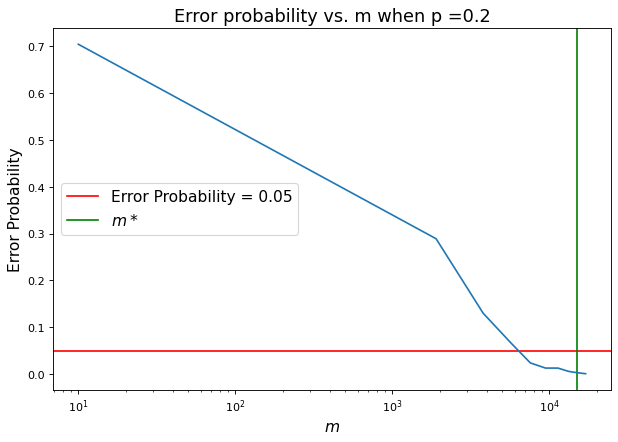

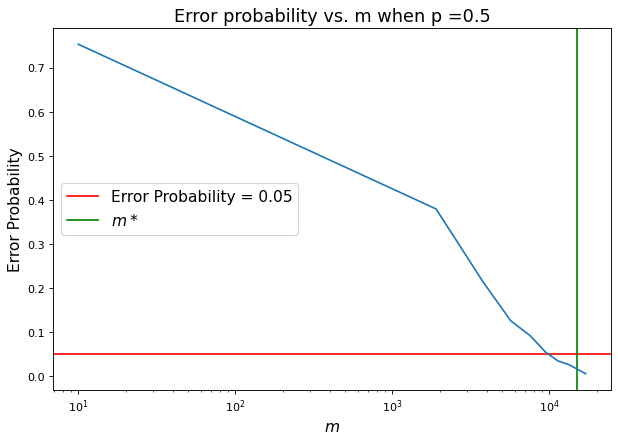

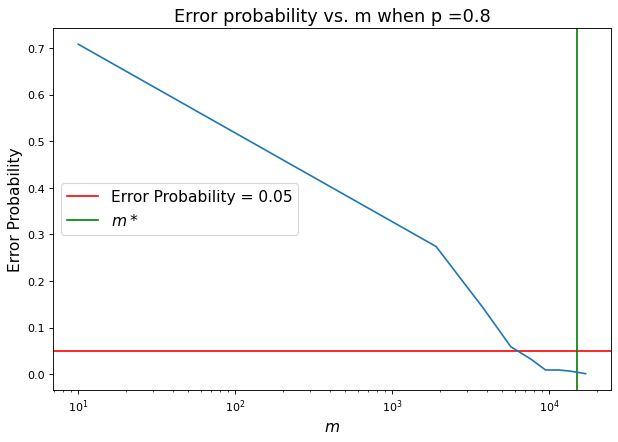

In [ ]:
import matplotlib.pyplot as plt
CI=95
p = 0.2
tab_m = np.linspace(10,17000,10)
prob_error = []
m_min=14979
reps = 1000

for p in tab_p:
  error_prob = []
  for mi in tab_m:
    #print('When p = ',p)
    av_votes_k = []
    for k in range (0, reps):
      votes_k = generate_votes(int(mi), p)
      av_pk = estimate_p(votes_k)
      av_votes_k.append(av_pk)

    count = 0
    for ak in av_votes_k:
      if ((ak >=(p-0.01)) & (ak <=(p+0.01))):
        count=count+1

    percentage_within_desire = count / reps
    error_prob_i = 1 - percentage_within_desire

    error_prob.append(error_prob_i)

    votes_averages_CI = np.percentile(av_votes_k, [CI_min,CI_max])
  
  #display(error_prob)
  m_min = 14979
  error_prob_max = 0.05
  fig = plt.figure(figsize=(9,6), dpi=80)
  plt.title('Error probability vs. m when p =%.1f' %p, fontsize=16)
  plt.xlabel('$m$', fontsize=14)
  plt.ylabel('Error Probability', fontsize=14)
  plt.axhline(error_prob_max,color="r",label='Error Probability = 0.05')
  plt.axvline(m_min,color="g",label="$m*$")
  plt.plot(tab_m,error_prob)
#plt.plot(tab_D_true,MSE_J,"-o", label = 'MSE_J')
#plt.plot(tab_D_true,Cramer,"-o",label = 'Cramer-Rao')
  #plt.plot(tab_D_true_to_plot,Cramer_to_plot,"-",color='b')
#plt.plot(18445, prob_error[-2],"o",label="$m*$")
  plt.xscale("log")
  plt.legend(fontsize=14);
#plt.ylim(0.95, 1.00000000)